In [2]:
import pymc3 as pm
import numpy as np

import theano
import theano.tensor as tt
import pandas
from pymc3_lib import *

# This is PyMC3 probabilistic framework tutorial

Values are formed using pm.Categorical discrete distribution

# Single node - prior

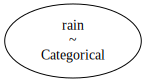

In [4]:
with pm.Model() as m:
    rain = pm.Categorical('rain', C(0.2))

pm.model_to_graphviz(m)

# Two nodes: Second node same as the first one

In [20]:
with pm.Model() as m:
    rain = pm.Categorical('rain', C(0.2))
    wet_grass = pm.Deterministic('wet_grass', rain)

    prior_trace = pm.sample_prior_predictive(100000)



p_rain = prior_trace['rain'][:].mean()
p_wet_grass = prior_trace['wet_grass'][:].mean()
print(f'P(rain) is {p_rain}')
print(f'P(wet_grass) is {p_wet_grass}')

P(rain) is 0.19979
P(wet_grass) is 0.19979


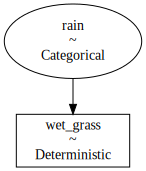

In [21]:
pm.model_to_graphviz(m)

# Two nodes: Second node related to the first one

In [23]:
with pm.Model() as m:
    rain = pm.Categorical('rain', C(0.2))
    wet_grass = pm.Categorical('wet_grass', pm.math.switch(rain, C(0.9), C(0.1)))

    prior_trace = pm.sample_prior_predictive(100000)

p_rain = prior_trace['rain'][:].mean()
p_wet_grass = prior_trace['wet_grass'][ (prior_trace['rain'] == 1) ].mean()
print(f'P(rain) is {p_rain}')
print(f'P(wet_grass) is {p_wet_grass}')

# def get_prob_by_conditions

P(rain) is 0.19842
P(wet_grass) is 0.9012196351174276


In [24]:
get_prob_by_conditions(prior_trace, target='rain', conditions=['!wet_grass'])

0.0264307675710664

In [25]:
get_prob_by_conditions(prior_trace, target='rain', conditions=['wet_grass'])

0.691920755301037

In [26]:
get_prob_by_conditions(prior_trace, target='rain', conditions=['wet_grass', 'rain'])

1.0

In [27]:
get_prob_by_conditions(prior_trace, target='rain', conditions=['wet_grass', '!rain'])

0.0

In [28]:
get_prob_by_conditions(prior_trace, target='wet_grass')

0.25844

In [29]:
get_prob_by_conditions(prior_trace, target='wet_grass', conditions=['rain'])

0.9012196351174276

In [30]:
get_prob_by_conditions(prior_trace, target='wet_grass', conditions=['!rain'])

0.09932882556950023

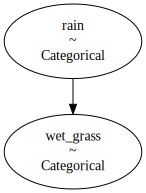

In [31]:
pm.model_to_graphviz(m)

# Three nodes: Binary vars

In [32]:
# class CPT

cpt = CPT({
'rain':  {'sprinkler': C(0.9), '!sprinkler': C(0.3)},
'!rain': {'sprinkler': C(0.7), '!sprinkler': C(0.00001)},
})
cpt[0,0]
cpt.cpt_dict['!rain']['!sprinkler'][1]

cpt.cpt.eval()
cpt.cpt.eval()[0][0]
cpt.cpt.eval()[0][1]
cpt.cpt.eval()[1][0]
cpt.cpt.eval()[1][1]

with pm.Model() as m:
    rain = pm.Categorical('rain', C(0.2))
    sprinkler = pm.Categorical('sprinkler', C(0.6))

    wet_grass = pm.Categorical('wet_grass', cpt.pymc_model_fn(rain, sprinkler))

    prior_trace = pm.sample_prior_predictive(100000)

In [33]:
print(get_prob_by_conditions(prior_trace, target='wet_grass'))
print(get_prob_by_conditions(prior_trace, target='wet_grass', conditions=['rain']))
print(get_prob_by_conditions(prior_trace, target='wet_grass', conditions=['sprinkler']))

print(get_prob_by_conditions(prior_trace, target='wet_grass', conditions=['rain', '!sprinkler']))
print(get_prob_by_conditions(prior_trace, target='wet_grass', conditions=['!rain', 'sprinkler']))

print(get_prob_by_conditions(prior_trace, target='wet_grass', conditions=['!rain', '!sprinkler']))
print(get_prob_by_conditions(prior_trace, target='wet_grass', conditions=['rain', 'sprinkler']))

0.46645
0.6586877217530358
0.7394945366586038
0.29338738282239674
0.6996738312285691
0.0
0.8966740942477511


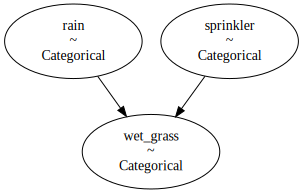

In [34]:
pm.model_to_graphviz(m)

# More than 4 nodes and more tables:

In [35]:
cpt_wet_grass = CPT({
'rain':  {'sprinkler': C(0.9), '!sprinkler': C(0.3)},
'!rain': {'sprinkler': C(0.7), '!sprinkler': C(0.00001)},
})
cpt_grass_growth = CPT({
'wet_grass': {'fertilizer': C(0.9), '!fertilizer': C(0.7)},
'!wet_grass': {'fertilizer': C(0.4), '!fertilizer': C(0.1)},
})

with pm.Model() as m:
    rain = pm.Categorical('rain', C(0.2))
    sprinkler = pm.Categorical('sprinkler', C(0.6))
    fertilizer = pm.Categorical('fertilizer', C(0.5))

    wet_grass = pm.Categorical('wet_grass', cpt_wet_grass.pymc_model_fn(rain, sprinkler))
    grass_growth = pm.Categorical('grass_growth', cpt_grass_growth.pymc_model_fn(wet_grass, fertilizer))

    prior_trace = pm.sample_prior_predictive(100000)

In [36]:
print(get_prob_by_conditions(prior_trace, target='wet_grass'))
print(get_prob_by_conditions(prior_trace, target='grass_growth'))
print(get_prob_by_conditions(prior_trace, target='grass_growth', conditions=['!rain', '!sprinkler', '!fertilizer']))
print(get_prob_by_conditions(prior_trace, target='grass_growth', conditions=['rain', '!sprinkler', '!fertilizer']))
print(get_prob_by_conditions(prior_trace, target='grass_growth', conditions=['rain', 'sprinkler', '!fertilizer']))
print(get_prob_by_conditions(prior_trace, target='grass_growth', conditions=['rain', 'sprinkler', 'fertilizer']))

0.46926
0.50865
0.09839831139806307
0.2892602605062669
0.6384952766531714
0.8444444444444444


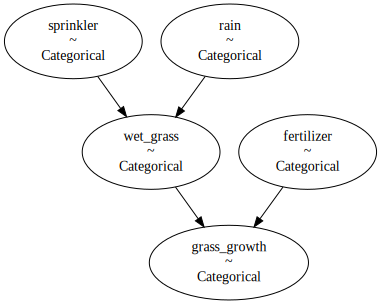

In [37]:
pm.model_to_graphviz(m)

# One node: More categorical options

In [38]:
with pm.Model() as m:
    rain = pm.Categorical('rain', [0.7, 0.2, 0.1])

    prior_trace = pm.sample_prior_predictive(100000)

# def get_prob_by_conditions_cat

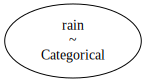

In [39]:
pm.model_to_graphviz(m)

In [40]:
print(get_prob_by_conditions_cat(prior_trace, target='rain=0'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=1'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=2'))

0.7008
0.19916
0.10004


# Two nodes: More categorical options - Deterministic

In [41]:
with pm.Model() as m:
    rain = pm.Categorical('rain', [0.7, 0.2, 0.1])
    wet_grass = pm.Deterministic('wet_grass', rain)

    prior_trace = pm.sample_prior_predictive(100000)

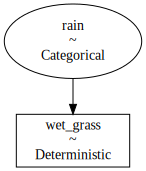

In [42]:
pm.model_to_graphviz(m)

In [43]:
get_prob_by_conditions_cat(prior_trace, target='wet_grass=2')

0.10076

# Two nodes: 3 - categorical options

In [13]:
mt1 = theano.shared(np.asarray([[1.,0.,0.], [0.,1.,0.], [0.,0.,1.]]))

# def switch3

with pm.Model() as m:
    rain = pm.Categorical('rain', [0.7, 0.2, 0.1])
    wet_grass = pm.Categorical('wet_grass', switch3(rain, mt=mt1))

    prior_trace = pm.sample_prior_predictive(100000)

0.10028

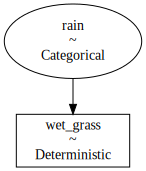

In [44]:
pm.model_to_graphviz(m)

In [45]:
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0'))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1'))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=2'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=0'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=1'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=2'))

0.70125
0.19799
0.10076
0.70125
0.19799
0.10076


# Two nodes: 4 - categorical options

In [48]:
mt2 = theano.shared(np.asarray([[1.,0.,0.,0.], [0.,1.,0.,0.], [0.,0.,1.,0.],[0.,0.,0.,1.]]))

# def switch4

with pm.Model() as m:
    rain = pm.Categorical('rain', [0.7, 0.2, 0.07, 0.03])
    wet_grass = pm.Categorical('wet_grass', switch4(rain, mt=mt2))

    prior_trace = pm.sample_prior_predictive(100000)

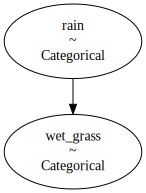

In [49]:
pm.model_to_graphviz(m)

In [50]:
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0'))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1'))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=2'))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=3'))

0.70372
0.19722
0.06913
0.02993


In [51]:
print(get_prob_by_conditions_cat(prior_trace, target='rain=0'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=1'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=2'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=3'))

0.70372
0.19722
0.06913
0.02993


# Transition Mapping Table (2D Matrix) class

In [55]:
# class CPTMapping

cptm1 = CPTMapping(
    [[1.,0.,0.], [0.,1.,0.], [0.,0.,1.]],
    input=['no_rain','small_rain','big_rain'], output=['dried_grass','wet_grass','soak_grass']
            )
cptm1()

with pm.Model() as m:
    rain = pm.Categorical('rain', [0.7, 0.2, 0.1])
    wet_grass = pm.Categorical('wet_grass', switch3(rain, mt=cptm1))

    prior_trace = pm.sample_prior_predictive(100000)

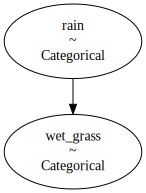

In [56]:
pm.model_to_graphviz(m)

In [57]:
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0'))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1'))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=2'))

0.69811
0.19967
0.10222


In [58]:
print(get_prob_by_conditions_cat(prior_trace, target='rain=0'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=1'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=2'))

0.69811
0.19967
0.10222


# ConditionalProbabilityTable for multivariate n dimensions

In [59]:
# class CPTCat

cptcat_wet_grass = CPTCat({
'rain=0': {'sprinkler=0': C(0.01), 'sprinkler=1': C(0.1), 'sprinkler=2': C(0.6)},
'rain=1': {'sprinkler=0': C(0.05), 'sprinkler=1': C(0.2), 'sprinkler=2': C(0.75)},
'rain=2': {'sprinkler=0': C(0.3), 'sprinkler=1': C(0.6), 'sprinkler=2': C(0.9)},
})
cptcat_wet_grass.n_vars
cptcat_wet_grass.out_n_vars
cptcat_wet_grass.vars

cptcat_wet_grass.cpt.eval()


with pm.Model() as m:
    rain = pm.Categorical('rain', [0.7, 0.2, 0.1])
    sprinkler = pm.Categorical('sprinkler', [0.01, 0.29, 0.7])

    wet_grass = pm.Categorical('wet_grass', cptcat_wet_grass.pymc_model_fn(rain, sprinkler))

    prior_trace = pm.sample_prior_predictive(100000)

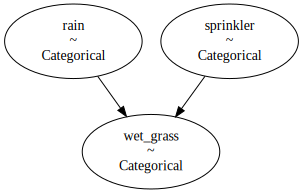

In [60]:
pm.model_to_graphviz(m)

In [61]:
print(get_prob_by_conditions_cat(prior_trace, target='rain=0', conditions=['sprinkler=0']))
print(get_prob_by_conditions_cat(prior_trace, target='rain=0', conditions=['sprinkler=2']))
print(get_prob_by_conditions_cat(prior_trace, target='rain=2', conditions=['wet_grass=1', 'sprinkler=2']))
print(get_prob_by_conditions_cat(prior_trace, target='rain=2', conditions=['sprinkler=0']))

0.7026532479414456
0.7001131594402189
0.13460039830288337
0.09606587374199452


In [62]:
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1', conditions=['rain=0', 'sprinkler=0']))

0.01171875


In [63]:
print(get_prob_by_conditions_cat(prior_trace, target='rain=1'))
print(get_prob_by_conditions_cat(prior_trace, target='rain=2'))

0.20068
0.09941


In [64]:
print(get_prob_by_conditions_cat(prior_trace, target='sprinkler=0'))
print(get_prob_by_conditions_cat(prior_trace, target='sprinkler=1'))
print(get_prob_by_conditions_cat(prior_trace, target='sprinkler=2'))

0.01093
0.29094
0.69813


In [65]:
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0'))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1'))

0.48788
0.51212


In [66]:
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1', conditions=['rain=0', 'sprinkler=0']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1', conditions=['rain=0', 'sprinkler=1']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1', conditions=['rain=0', 'sprinkler=2']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1', conditions=['rain=1', 'sprinkler=0']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1', conditions=['rain=1', 'sprinkler=1']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1', conditions=['rain=1', 'sprinkler=2']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1', conditions=['rain=2', 'sprinkler=0']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1', conditions=['rain=2', 'sprinkler=1']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=1', conditions=['rain=2', 'sprinkler=2']))

0.01171875
0.09756217438317114
0.6010598031794095
0.05454545454545454
0.20558331897294502
0.7547169811320755
0.3142857142857143
0.6057724957555178
0.9023363807865331


In [67]:
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0', conditions=['rain=0', 'sprinkler=0']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0', conditions=['rain=0', 'sprinkler=1']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0', conditions=['rain=0', 'sprinkler=2']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0', conditions=['rain=1', 'sprinkler=0']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0', conditions=['rain=1', 'sprinkler=1']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0', conditions=['rain=1', 'sprinkler=2']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0', conditions=['rain=2', 'sprinkler=0']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0', conditions=['rain=2', 'sprinkler=1']))
print(get_prob_by_conditions_cat(prior_trace, target='wet_grass=0', conditions=['rain=2', 'sprinkler=2']))

0.98828125
0.9024378256168288
0.39894019682059045
0.9454545454545454
0.794416681027055
0.24528301886792453
0.6857142857142857
0.39422750424448216
0.09766361921346683


# Two nodes: Normal distribution to Categorical one
- two Normal distr.

In [69]:
with pm.Model() as m:
    focus_object_0 = pm.Normal('focus_object_0', mu=0.0, sigma=1)
    focus_object_1 = pm.Normal('focus_object_1', mu=1.0, sigma=1)

    focus_object_id = pm.Deterministic('focus_object_id', tt.argmin([focus_object_0, focus_object_1]))

    prior_trace = pm.sample_prior_predictive(100000)

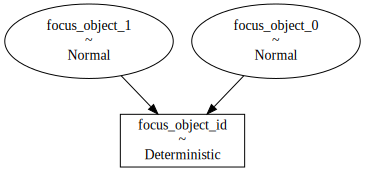

In [70]:
pm.model_to_graphviz(m)

In [71]:
print(get_prob_by_conditions_cat(prior_trace, target='focus_object_id=0'))
print(get_prob_by_conditions_cat(prior_trace, target='focus_object_id=1'))

0.75998
0.24002


- Vector Normal distr.

In [72]:
with pm.Model() as m:
    focus_object = pm.Normal('focus_object', mu=[0.0, 1.0], sigma=1, shape=(2))

    focus_object_id = pm.Deterministic('focus_object_id', tt.argmin(focus_object))

    prior_trace = pm.sample_prior_predictive(100000)

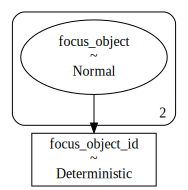

In [73]:
pm.model_to_graphviz(m)

In [74]:
print(get_prob_by_conditions_cat(prior_trace, target='focus_object_id=0'))
print(get_prob_by_conditions_cat(prior_trace, target='focus_object_id=1'))

0.75851
0.24149


# Float input to the model

In [75]:
test_input = theano.shared(np.asarray([0.0,1.0]))
m = pm.Model()
with m:
    focus_object_0 = pm.Normal('focus_object_0', mu=test_input[0], sigma=1)
    focus_object_1 = pm.Normal('focus_object_1', mu=test_input[1], sigma=1)

    focus_object_id = pm.Deterministic('focus_object_id', tt.argmin([focus_object_0, focus_object_1]))

    prior_trace = pm.sample_prior_predictive(100000)

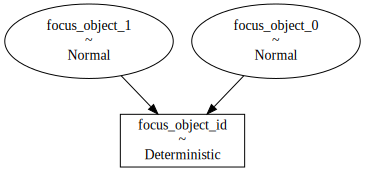

In [76]:
pm.model_to_graphviz(m)

In [77]:
print(get_prob_by_conditions_cat(prior_trace, target='focus_object_id=0'))
print(get_prob_by_conditions_cat(prior_trace, target='focus_object_id=1'))

0.76037
0.23963


--------

In [78]:
test_input = theano.shared(np.asarray([1.0,0.0]))
m = pm.Model()
with m:
    focus_object_0 = pm.Normal('focus_object_0', mu=test_input[0], sigma=1)
    focus_object_1 = pm.Normal('focus_object_1', mu=test_input[1], sigma=1)

    focus_object_id = pm.Deterministic('focus_object_id', tt.argmin([focus_object_0, focus_object_1]))

    #prior_trace = pm.sample_prior_predictive(100000)
    trace = pm.sample(10000, initvals={'focus_object_0': 1.0})

/tmp/ipykernel_48082/2468588965.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000, initvals={'focus_object_0': 1.0})
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


TypeError: function() got an unexpected keyword argument 'initvals'

/tmp/ipykernel_48082/1386122485.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(prior_trace)


AttributeError: 'dict' object has no attribute '_straces'

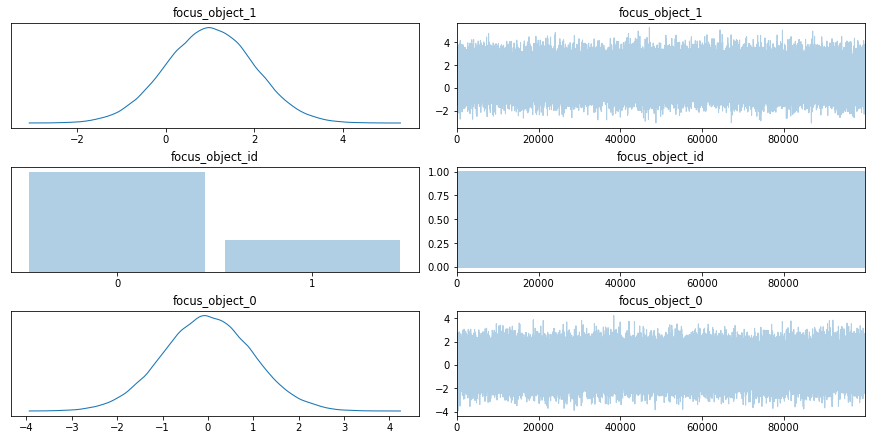

In [81]:
pm.traceplot(prior_trace)
prior_trace._straces[0]['samples'][0]

In [ ]:
print(get_prob_by_conditions_cat(prior_trace, target='focus_object_id=0'))
print(get_prob_by_conditions_cat(prior_trace, target='focus_object_id=1'))